# **WaterAid Tanzania: Water Well Rehabilitation Project** 


### **Final Project Submission**
Please fill out:

Student name: Alex Irungu

Group: GROUP 1

Student pace: PART TIME 

Scheduled project review date/time: PHASE 3

Instructor name: SAMUEL KARU

## Business Understanding

Limited access to safe drinking water affects hundreds of millions of people worldwide. In Tanzania, a developing country in East Africa, over 57 million people are fighting to get access to clean water, life's most important resource. While there is plenty of fresh water available throughout the country, several access issues with the country's water wells persist, posing a serious threat to public health and hampering socio-economic development.

Access to clean, safe water is crucial not only for the health of Tanzanian households but also for the country's overall development, as it is required for agricultural and industrial output. The issue of water supply in Tanzania is particularly concerning due to the number of non-functioning wells that are prohibiting citizens from exercising a core human right.

## Stakeholder


Our primary stakeholder is "WaterAid Tanzania," a non-governmental organization (NGO) dedicated to improving access to clean water across Tanzania. WaterAid Tanzania works closely with local communities and the Tanzanian government to identify, repair, and maintain water points throughout the country.

## Business Problem

There is a clear need to identify the non-functioning wells that are hindering citizens' access to clean water. WaterAid Tanzania needs to efficiently allocate its limited resources to maximize the impact of its water point rehabilitation efforts. The organization requires a data-driven approach to:

1. Identify water points that are likely to be non-functional or in need of repair.
2. Understand the factors contributing to water point failure.
3. Prioritize maintenance and repair activities based on predicted water point conditions.
4. Inform strategies for building new water points that are more likely to remain functional.

## Project Approach

1. Data Preprocessing: Clean the dataset, handle missing values, and perform feature engineering.
2. Exploratory Data Analysis: Gain insights into the relationships between various features and water point conditions.
3. Feature Selection: Identify the most relevant features for predicting water point functionality.
4. Model Development: Train and evaluate multiple classification algorithms (e.g., Random Forest, XGBoost, Logistic Regression).
5. Model Evaluation: Use appropriate metrics to assess model performance.
6. Interpretation and Insights: Analyze feature importance and extract actionable insights from the model.
7. Recommendations: Provide data-driven recommendations to WaterAid Tanzania for improving water point management and maintenance strategies.

## Model Success Metrics

The models will be evaluated based on the following metrics:

1. Accuracy: Measures the overall correctness of the model's predictions.
2. Precision: Indicates the proportion of correct positive predictions (e.g., correctly identified non-functional wells) out of all positive predictions.

For this study, models that attain a score of 65% and above on these metrics will be considered well-performing. However, we will also consider other relevant metrics such as recall and F1-score to ensure a comprehensive evaluation of model performance.

## Data Understanding

### Importing libraries and loading data

In [146]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')



In [147]:
# loading the boreholes dataset
data = pd.read_csv("training_set_values.csv")


In [148]:
#viewing the top 10 rows
data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [149]:
#viewing the bottom rows
data.tail(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [150]:
#information on dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [151]:
#loading dataset that shows functionality status of water
data2 = pd.read_csv('training_set_label.csv')

In [152]:
data2.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [153]:
data2.tail(10)

,id,status_group
59390,13677,functional
59391,44885,non functional
59392,40607,non functional
59393,48348,functional
59394,11164,non functional
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [154]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [155]:
# now we merge the two datasets
df = data.join(data2.set_index('id'), on='id')

In [156]:
df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [157]:
df.tail(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [159]:
df.shape

(59400, 41)

In [160]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Observations

1. The object datatype needs to be changed to category datatype.
2. The amount_tsh needs to be changed from float to integer since the 0s are redundant.
3. The dataset is large and does not contain alot of null values. However, upon further investigation of the columns it is realized that the column num_private only contains 0 values thus will have to be dropped. The columns: source_type, waterpoint_type, and quantity_group will also be dropped as they are duplicate columns.
4. The construction_year, amount_tsh and population column appears to have a big number of 0s

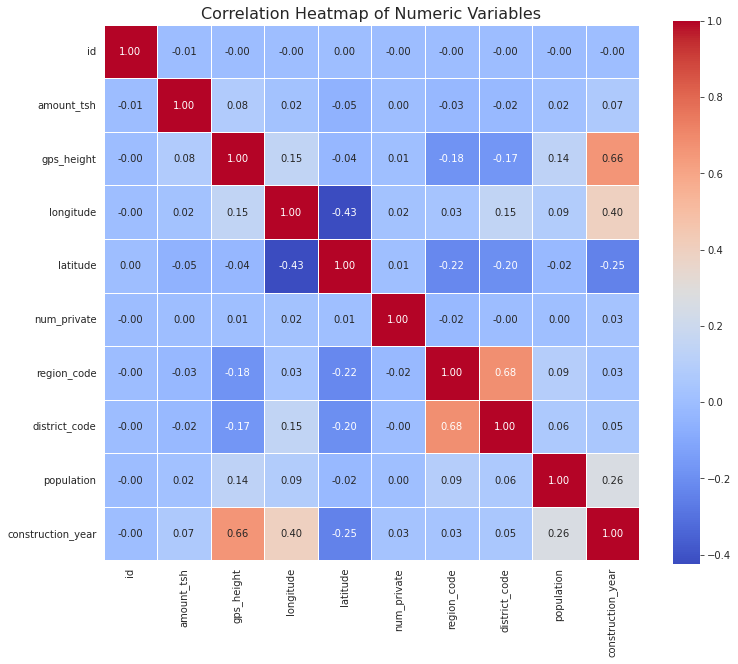

                         id  amount_tsh  gps_height  longitude  latitude  \
id                 1.000000   -0.005321   -0.004692  -0.001348  0.001718   
amount_tsh        -0.005321    1.000000    0.076650   0.022134 -0.052670   
gps_height        -0.004692    0.076650    1.000000   0.149155 -0.035751   
longitude         -0.001348    0.022134    0.149155   1.000000 -0.425802   
latitude           0.001718   -0.052670   -0.035751  -0.425802  1.000000   
num_private       -0.002629    0.002944    0.007237   0.023873  0.006837   
region_code       -0.003028   -0.026813   -0.183521   0.034197 -0.221018   
district_code     -0.003044   -0.023599   -0.171233   0.151398 -0.201020   
population        -0.002813    0.016288    0.135003   0.086590 -0.022152   
construction_year -0.002082    0.067915    0.658727   0.396732 -0.245278   

                   num_private  region_code  district_code  population  \
id                   -0.002629    -0.003028      -0.003044   -0.002813   
amount_tsh     

In [161]:
#visualize a correlation matrix

# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)

# Set the title
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)

# Show the plot
plt.show()

# Print the correlation matrix
print(correlation_matrix)

## Data Preparation

Here after looking at the data a selection of the columns that will used in the model was made. These columns were then grouped depending on whether they were numerical or categorical.

The categorical columns are 

1. funder
2. installer
3. date_recorded
4. basin
5. region
6. scheme_management
7. extraction_type_class
8. payment
9. water_quality
10. quantity
11. source_type
12. waterpoint_type_group
13. status_group

The numerical columns selected are
1. amount_tsh
2. gps_height
3. population
4. longitude
5. latitude
6. construction_year

Now we create a dataframe that contains the above columns

In [162]:
tanzania_df = df.loc[:, ['amount_tsh', 'gps_height', 'funder', 'installer', 'population', 'longitude',
                         'latitude', 'date_recorded', 'construction_year', 'basin', 'region',
                          'scheme_management', 'extraction_type_class', 
                           'payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type_group', 'status_group' ]]

In [163]:
tanzania_df.head(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
4,0.0,0,Action In A,Artisan,0,31.130847,-1.825359,2011-07-13,0,Lake Victoria,Kagera,NaN,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional
6,0.0,0,Dwsp,DWSP,0,33.362410,-3.766365,2012-10-01,0,Internal,Shinyanga,VWC,handpump,never pay,soft,enough,borehole,hand pump,non functional
7,0.0,0,Rwssp,DWE,0,32.620617,-4.226198,2012-10-09,0,Lake Tanganyika,Shinyanga,NaN,handpump,unknown,milky,enough,shallow well,hand pump,non functional
8,0.0,0,Wateraid,Water Aid,0,32.711100,-5.146712,2012-11-03,0,Lake Tanganyika,Tabora,VWC,handpump,never pay,salty,seasonal,borehole,hand pump,non functional
9,0.0,0,Isingiro Ho,Artisan,0,30.626991,-1.257051,2011-08-03,0,Lake Victoria,Kagera,NaN,handpump,never pay,soft,enough,shallow well,hand pump,functional


In [164]:
tanzania_df.tail(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
59390,0.0,1715,Rudep,DWE,150,31.370848,-8.258160,2011-08-04,1991,Lake Tanganyika,Rukwa,VWC,handpump,never pay,soft,insufficient,borehole,hand pump,functional
59391,0.0,540,Government Of Tanzania,Government,210,38.044070,-4.272218,2013-08-03,1967,Pangani,Kilimanjaro,Water authority,gravity,never pay,soft,enough,river/lake,communal standpipe,non functional
59392,0.0,0,Government Of Tanzania,Government,0,33.009440,-8.520888,2011-04-15,0,Lake Rukwa,Mbeya,VWC,gravity,never pay,soft,enough,spring,communal standpipe,non functional
59393,0.0,0,Private,Private,0,33.866852,-4.287410,2012-10-27,0,Internal,Tabora,Water authority,gravity,pay per bucket,soft,insufficient,dam,other,functional
59394,500.0,351,World Bank,ML appro,89,37.634053,-6.124830,2011-03-09,2007,Wami / Ruvu,Morogoro,VWC,submersible,pay monthly,soft,enough,borehole,communal standpipe,non functional
59395,10.0,1210,Germany Republi,CES,125,37.169807,-3.253847,2013-05-03,1999,Pangani,Kilimanjaro,Water Board,gravity,pay per bucket,soft,enough,spring,communal standpipe,functional
59396,4700.0,1212,Cefa-njombe,Cefa,56,35.249991,-9.070629,2011-05-07,1996,Rufiji,Iringa,VWC,gravity,pay annually,soft,enough,river/lake,communal standpipe,functional
59397,0.0,0,NaN,NaN,0,34.017087,-8.750434,2011-04-11,0,Rufiji,Mbeya,VWC,handpump,pay monthly,fluoride,enough,borehole,hand pump,functional
59398,0.0,0,Malec,Musa,0,35.861315,-6.378573,2011-03-08,0,Rufiji,Dodoma,VWC,handpump,never pay,soft,insufficient,shallow well,hand pump,functional
59399,0.0,191,World Bank,World,150,38.104048,-6.747464,2011-03-23,2002,Wami / Ruvu,Morogoro,VWC,handpump,pay when scheme fails,salty,enough,shallow well,hand pump,functional


In [165]:
tanzania_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   funder                 55763 non-null  object 
 3   installer              55745 non-null  object 
 4   population             59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   date_recorded          59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  scheme_management      55522 non-null  object 
 12  extraction_type_class  59400 non-null  object 
 13  payment                59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

In [166]:
# categorical columns
categorical_cols = tanzania_df.select_dtypes(include='object').columns
categorical_cols

Index(['funder', 'installer', 'date_recorded', 'basin', 'region',
       'scheme_management', 'extraction_type_class', 'payment',
       'water_quality', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [167]:
#numerical columns
numerical_cols = tanzania_df.select_dtypes(include='number').columns
numerical_cols

Index(['amount_tsh', 'gps_height', 'population', 'longitude', 'latitude',
       'construction_year'],
      dtype='object')

## Data Cleaning

Also known as data cleansing or data scrubbing, is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in datasets to improve data quality and reliability for analysis.

In [168]:
# checking for duplicates
tanzania_df.duplicated().sum()

688

In [169]:
# drop the duplicate values
tanzania_df.drop_duplicates(inplace=True)

In [170]:
#checking for any duplicates after being dropped
tanzania_df.duplicated().sum()

0

Our dataset has 0 duplicates

In [171]:
#Handling missing values
#function for identifying missing values
def missing_values(data):
    #identify missing values and their percentages
    #drop values that have no missing values
    #return data with missing values

    miss_val = data.isna().sum().sort_values(ascending=False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending=False)
    missing_values = pd.DataFrame({'Missing Values': miss_val, 'In Percentage': percentage})
    missing_values.drop(missing_values[missing_values['In Percentage'] == 0].index, inplace=True)
    return missing_values


In [172]:
missing_values(tanzania_df)

,Missing Values,In Percentage
scheme_management,3855,0.065659
installer,3653,0.062219
funder,3635,0.061912


In [173]:
#dropping the rows of columns with missing values
tanzania_df = tanzania_df.dropna()


In [174]:
tanzania_df.head()

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional


In [175]:
# confirming if theres any missing values
missing_values(tanzania_df)

,Missing Values,In Percentage


Our dataset has 0 missing values

In [176]:
# checking for outliers
sns.set_style('whitegrid')

def box_plot(data, column, hue=None):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=data, hue=hue)
    plt.title(f'{column} outliers')
    plt.show()

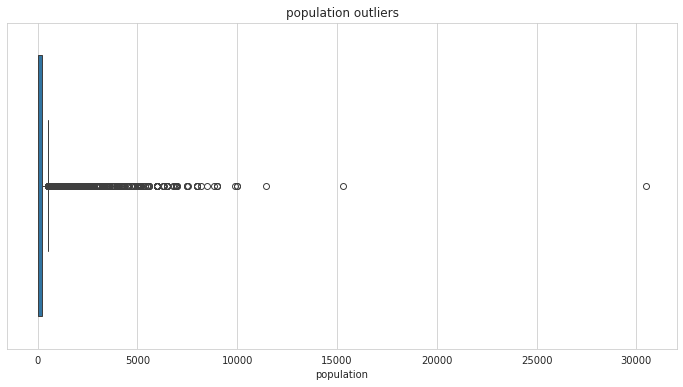

In [177]:
box_plot(tanzania_df, 'population')

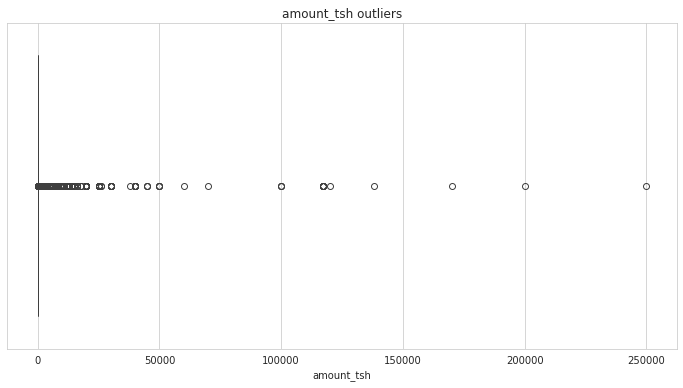

In [178]:
box_plot(tanzania_df, 'amount_tsh')

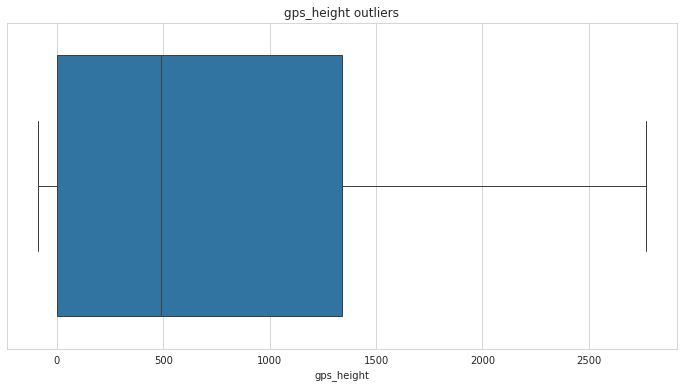

In [179]:
box_plot(tanzania_df, 'gps_height')

In [180]:
# correcting column data types
# changing object datatype to category
for i in categorical_cols:
    tanzania_df[i] = tanzania_df[i].astype('category')

In [181]:
# changing amount_tsh to integer
tanzania_df['amount_tsh'] = tanzania_df['amount_tsh'].astype('int64')

In [182]:
tanzania_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51216 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             51216 non-null  int64   
 1   gps_height             51216 non-null  int64   
 2   funder                 51216 non-null  category
 3   installer              51216 non-null  category
 4   population             51216 non-null  int64   
 5   longitude              51216 non-null  float64 
 6   latitude               51216 non-null  float64 
 7   date_recorded          51216 non-null  category
 8   construction_year      51216 non-null  int64   
 9   basin                  51216 non-null  category
 10  region                 51216 non-null  category
 11  scheme_management      51216 non-null  category
 12  extraction_type_class  51216 non-null  category
 13  payment                51216 non-null  category
 14  water_quality          51216 non-null  cate

In [183]:
tanzania_df.describe()

,amount_tsh,gps_height,population,longitude,latitude,construction_year
count,51216.000000,51216.000000,51216.000000,51216.000000,5.121600e+04,51216.000000
mean,349.378632,708.928108,182.983697,34.507327,-5.706255e+00,1360.459524
std,2820.465250,696.673946,479.997346,5.552404,2.877935e+00,930.608540
min,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,0.000000
25%,0.000000,0.000000,0.000000,33.151326,-8.223468e+00,0.000000
50%,0.000000,490.000000,40.000000,35.152166,-4.996222e+00,1988.000000
75%,35.000000,1341.000000,217.000000,37.353283,-3.326421e+00,2005.000000
max,250000.000000,2770.000000,30500.000000,40.323402,-2.000000e-08,2013.000000


# Exploratory Data Analysis

## Univariate Analysis

This is the simplest form of data analysis where the data being analyzed contains only one variable. It does not deal with causes or relationships and its main purpose is to describe the data and find patterns within it.

In [184]:
# we start with the numerical columns

# function to plot histogram
def hist_plot(data, column):
    fig, ax=plt.subplots(figsize=(12, 8))
    plt.hist(data=data, x=column, color='red')
    plt.title(f'Distribution of {column}')
    mn = round(data[column].mean(), 2)
    ax.axvline(x=mn, label=(f'mean:{mn}'), color='blue')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
    plt.legend()
    plt.show()

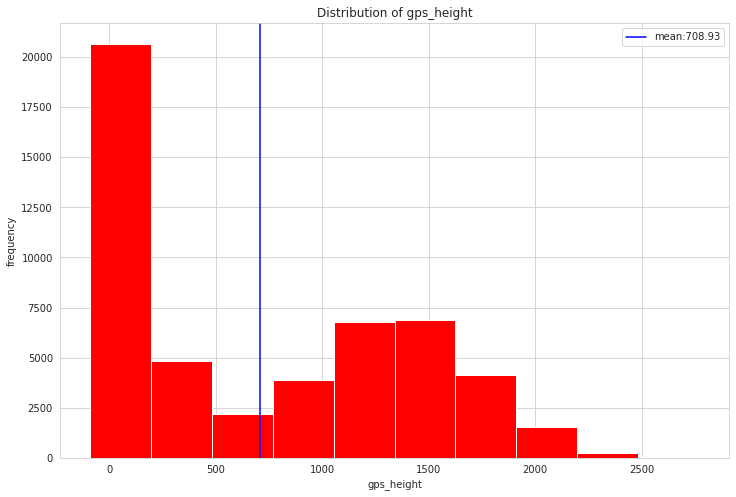

In [185]:
hist_plot(tanzania_df, 'gps_height')

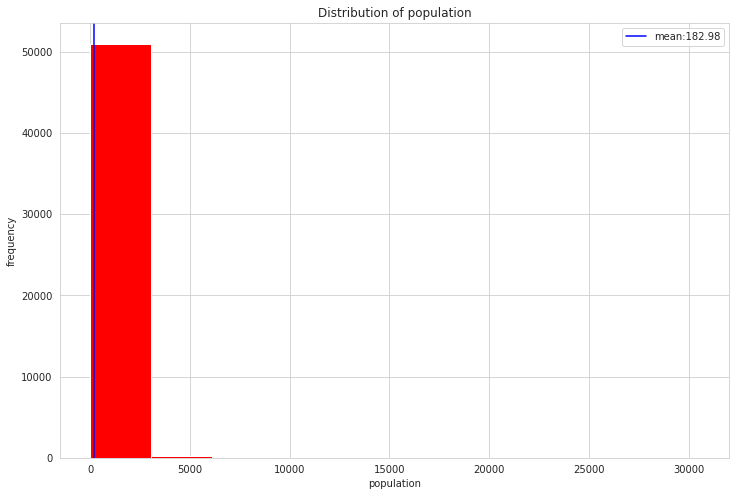

In [186]:
hist_plot(tanzania_df, 'population')

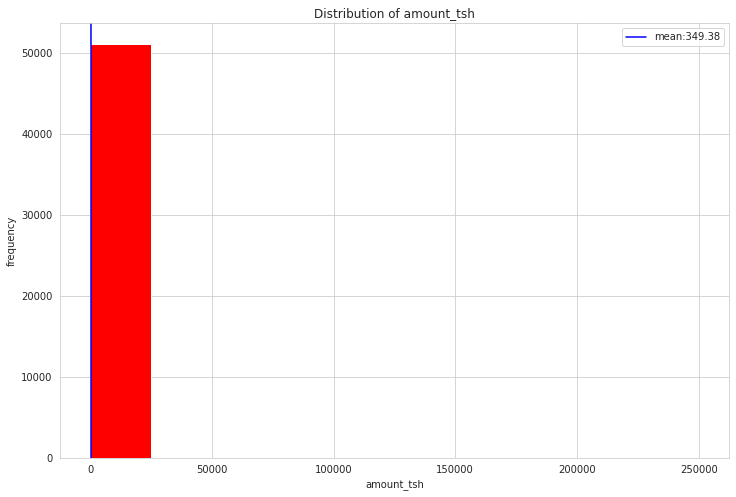

In [187]:
hist_plot(tanzania_df, 'amount_tsh')

### Observations

1. All three distributions are right-skewed, with high concentartions of low values
2. The gps_height distribution shows more spread and multiple peaks compared to the other two
3. These distributions suggests datasets with many low values and relatively few high values, which could indicate rural or underdeveloped areas for population and amount_tsh

Text(0.5, 1.0, 'Percentage of Water Points by Status Group')

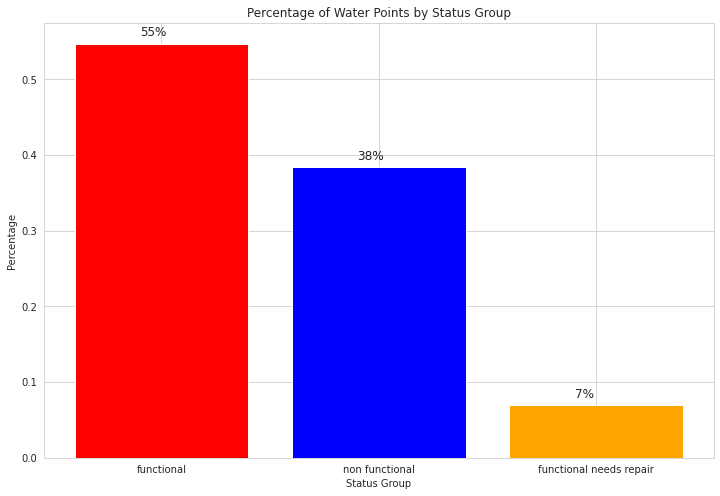

In [188]:
# lets carry out analysis on the categorical columns
# we start with column status_group which is our target variable which indicates whether a waterpoint
# functional , non-functional or needs repair

#Define colors for the bars
colors = ['red', 'blue', 'orange']

#calculate the value_counts of the status_group column as a percentage
counts = tanzania_df['status_group'].value_counts(normalize=True)

#create a bargraph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(counts.index, counts.values, color=colors)

#add percentage values to the top of each bar
for i, v in enumerate(counts):
    ax.text(i-0.1, v+0.01, f'{v:.0%}', fontsize=12)

#set the axis and labels
ax.set_xlabel('Status Group')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Water Points by Status Group')

from the above graph , we can tell that 55% of the boreholes are functional, 38% of them are non-functional and 7% need repair

In [189]:
# function to display count plots of the selected column
def count_plot(data, column, hue=None, palette=None):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data, hue=hue, order=data[column].value_counts().index, palette='tab20')
    plt.title(f'{column} count plot')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



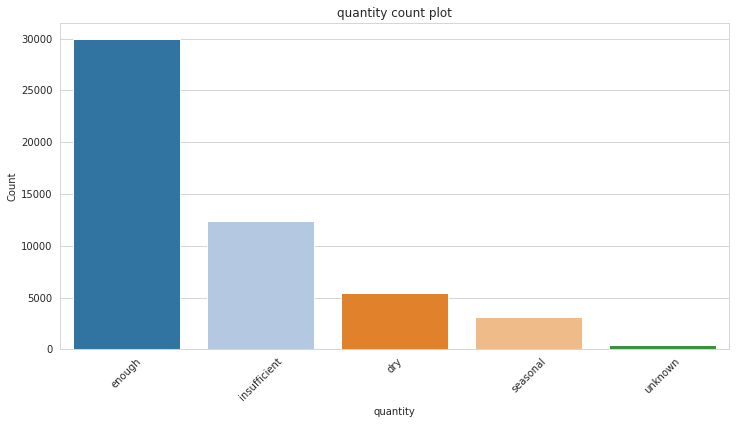

In [190]:
count_plot(tanzania_df, 'quantity')

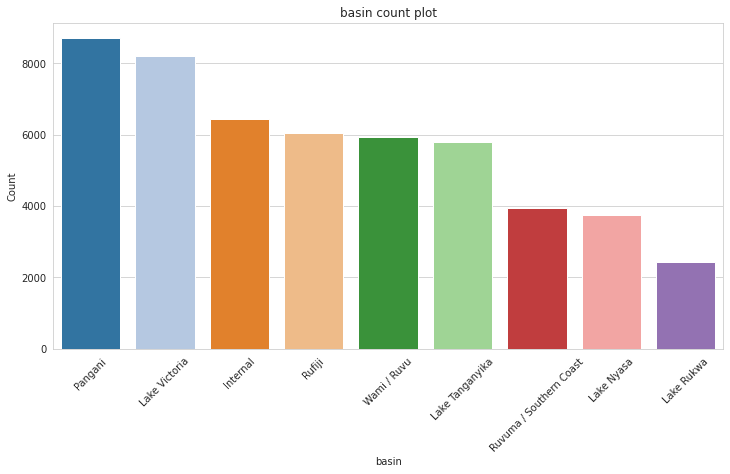

In [191]:
count_plot(tanzania_df, 'basin')

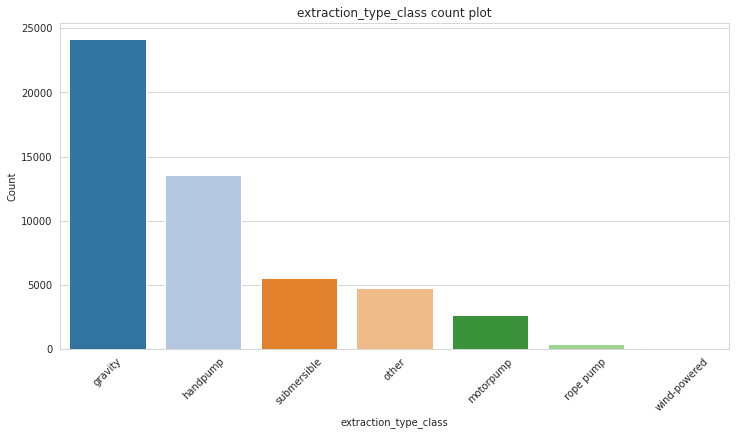

In [192]:
count_plot(tanzania_df, 'extraction_type_class')

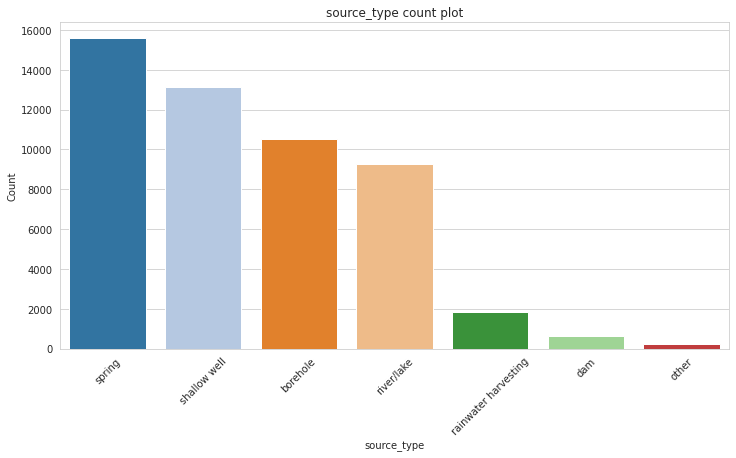

In [193]:
count_plot(tanzania_df, 'source_type')

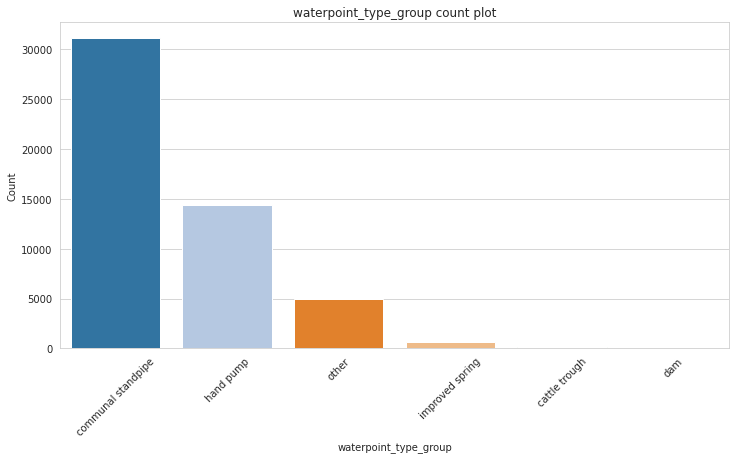

In [194]:
count_plot(tanzania_df, 'waterpoint_type_group')

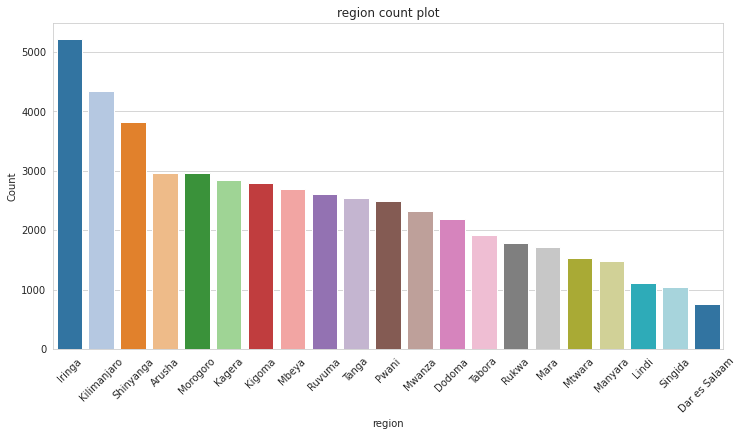

In [195]:
count_plot(tanzania_df, 'region')

### Observations

1. There is a significant variation in the distribution of water points across different categories(regions, types, sources etc)
2. Pangani and Lake Victoria are the top two basins
3. Springs are the most common source of water followed by shallow wells
4. Communal handpipes are the most common source of water, followed by shallow wells
5. Iringa and Kilimanjaro are the top regions with the most water points


## Bivariate Analysis

This is a statistical method used to analyze the relationship between two variables. It's a crucial technique in data analysis, helping to uncover patterns, correlations, and potential causal relationships. 

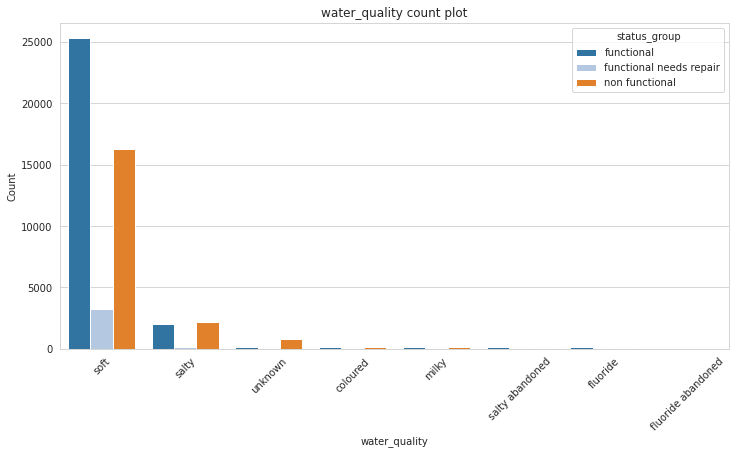

In [196]:
# we explore whether the predictor variables have an effect on our target variable

# Status group vs Water quality
count_plot(data=tanzania_df, column='water_quality', hue='status_group')

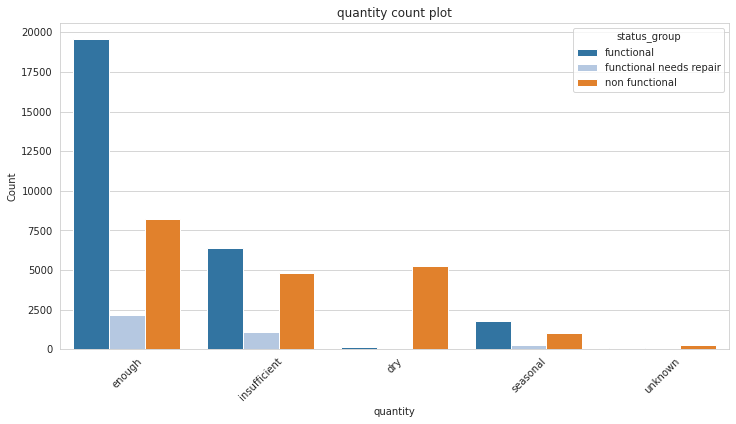

In [197]:
# status group vs quantity
count_plot(data=tanzania_df, column='quantity', hue='status_group')

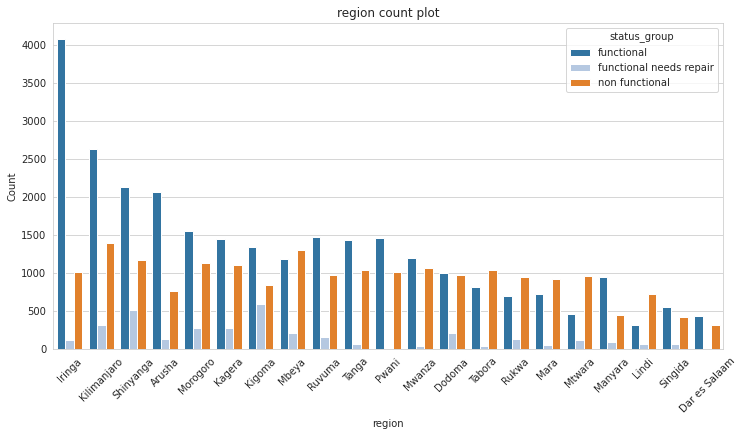

In [198]:
# status group vs region
count_plot(tanzania_df, 'region', 'status_group')

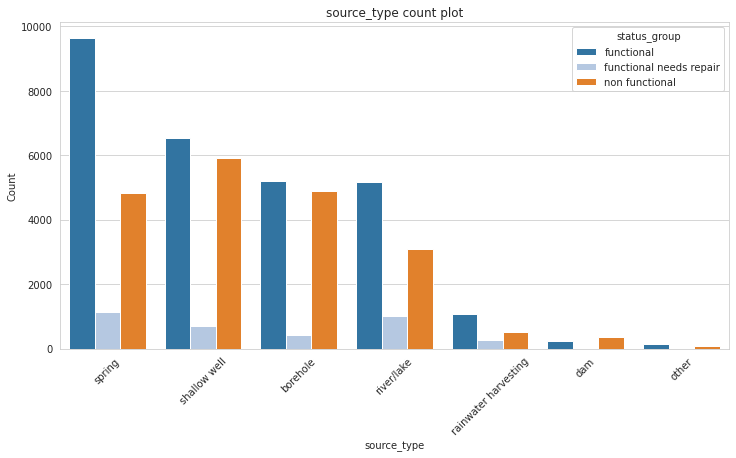

In [199]:
#status group vs source type
count_plot(tanzania_df, 'source_type', 'status_group')

### Observations

1. Springs are the most common source type with the highest number of functional water points
2. Iringa has the highest number of water points overall, with a large proportion being functional
3. 'Enough' is the most common quantity category, with a high number of functional points
4. 'Soft' is by far the most common quality tyoe 

## Feature Engineering

The process of using domain knowledge and data manipulation techniques to extract or create meaningful features from existing data, aiming to enhance machine learning model performance.

In [200]:
# Handling construction yeare
# Replace 0s with the median year 
median = tanzania_df.construction_year[tanzania_df.construction_year != 0].median()
tanzania_df.construction_year.replace(0, median, inplace=True)

In [201]:
#create a new column decade
tanzania_df['decade'] = tanzania_df['construction_year']
decades = {
    '60s': range(1960, 1970),
    '70s': range(1970, 1980),
    '80s': range(1980, 1990),
    '90s': range(1990, 2000),
    '00s': range(2000, 2010),
    '10s': range(2010, 2014)
}

for decade, years in decades.items():
    tanzania_df['decade'].replace(to_replace=list(years), value=decade, inplace=True)

In [202]:
#lets view the distribution of the wells construction

tanzania_df['decade'].value_counts()

decade
00s    30318
90s     6633
80s     4999
10s     4665
70s     4130
60s      471
Name: count, dtype: int64

In [203]:
#Date time conversion and feature extraction
tanzania_df['date_recorded'] = pd.to_datetime(tanzania_df['date_recorded'])
tanzania_df['year_recorded'] = tanzania_df['date_recorded'].dt.year
tanzania_df.drop('date_recorded', axis=1, inplace=True)

In [204]:
#Now we feature engineer a new column age which represents how long the well has been operational

#Age calculation
tanzania_df['Age'] = tanzania_df['year_recorded'] - tanzania_df['construction_year']
tanzania_df

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,construction_year,basin,region,...,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group,decade,year_recorded,Age
0,6000,1390,Roman,Roman,109,34.938093,-9.856322,1999,Lake Nyasa,Iringa,...,gravity,pay annually,soft,enough,spring,communal standpipe,functional,90s,2011,12
1,0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2010,Lake Victoria,Mara,...,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,2013,3
2,25,686,Lottery Club,World vision,250,37.460664,-3.821329,2009,Pangani,Manyara,...,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional,00s,2013,4
3,0,263,Unicef,UNICEF,58,38.486161,-11.155298,1986,Ruvuma / Southern Coast,Mtwara,...,submersible,never pay,soft,dry,borehole,communal standpipe,non functional,80s,2013,27
5,20,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2009,Pangani,Tanga,...,submersible,pay per bucket,salty,enough,other,communal standpipe,functional,00s,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,500,351,World Bank,ML appro,89,37.634053,-6.124830,2007,Wami / Ruvu,Morogoro,...,submersible,pay monthly,soft,enough,borehole,communal standpipe,non functional,00s,2011,4
59395,10,1210,Germany Republi,CES,125,37.169807,-3.253847,1999,Pangani,Kilimanjaro,...,gravity,pay per bucket,soft,enough,spring,communal standpipe,functional,90s,2013,14
59396,4700,1212,Cefa-njombe,Cefa,56,35.249991,-9.070629,1996,Rufiji,Iringa,...,gravity,pay annually,soft,enough,river/lake,communal standpipe,functional,90s,2011,15
59398,0,0,Malec,Musa,0,35.861315,-6.378573,2000,Rufiji,Dodoma,...,handpump,never pay,soft,insufficient,shallow well,hand pump,functional,00s,2011,11


In [205]:
# Binning numerical features
tanzania_df['population_bin'] = pd.cut(tanzania_df['population'],
                                       bins=[0, 50, 100, 500, 10000, 30500],
                                       labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

In [206]:
# Feature Encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(tanzania_df[['basin', 'water_quality']])

In [207]:
# Geographical features
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
tanzania_df['geo_cluster'] = kmeans.fit_predict(tanzania_df[['latitude', 'longitude']])


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75dd3c5c4dc0>
Traceback (most recent call last):
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75dd3c5c4dc0>
Traceback (most recent call last):
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback fun

In [208]:
# Interaction features
tanzania_df['pop_age_interaction'] = tanzania_df['population'] * tanzania_df['Age']

In [209]:
#AGGREGATED FEATURES
region_avg_pop = tanzania_df.groupby('region')['population'].transform('mean')
tanzania_df['region_avg_pop'] = region_avg_pop

In [210]:
# display first few rows 
print(tanzania_df.head())

   amount_tsh  gps_height               funder     installer  population  \
0        6000        1390                Roman         Roman         109   
1           0        1399              Grumeti       GRUMETI         280   
2          25         686         Lottery Club  World vision         250   
3           0         263               Unicef        UNICEF          58   
5          20           0  Mkinga Distric Coun           DWE           1   

   longitude   latitude  construction_year                    basin   region  \
0  34.938093  -9.856322               1999               Lake Nyasa   Iringa   
1  34.698766  -2.147466               2010            Lake Victoria     Mara   
2  37.460664  -3.821329               2009                  Pangani  Manyara   
3  38.486161 -11.155298               1986  Ruvuma / Southern Coast   Mtwara   
5  39.172796  -4.765587               2009                  Pangani    Tanga   

   ...           source_type waterpoint_type_group    status_g

In [211]:
# display the distribution of decades
print(tanzania_df['decade'].value_counts())

decade
00s    30318
90s     6633
80s     4999
10s     4665
70s     4130
60s      471
Name: count, dtype: int64


## Modelling

In [212]:
# prepare the data
y = tanzania_df['status_group']
X = tanzania_df.drop(['longitude', 'latitude', 'status_group', 'year_recorded', 'construction_year', 'funder', 'installer'], axis=1)

In [213]:
# separate numerical and categorical columns
nums = X.select_dtypes(include=['int64', 'float64']).columns
cats = X.select_dtypes(include=['category', 'object']).columns

In [214]:
#Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [215]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.3, stratify=y, random_state=42)

In [216]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[nums]), columns=nums, index=X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[nums]), columns=nums, index=X_val.index)

In [217]:
#One-hot encode categorical features
X_train_cat = pd.get_dummies(X_train[cats], drop_first=True)
X_val_cat = pd.get_dummies(X_val[cats], drop_first=True)

In [218]:
#Combine scaled numerical and encoded categorical features
X_train_final = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_val_final = pd.concat([X_val_scaled, X_val_cat], axis=1)

In [219]:
# Define a function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    train_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    val_score = cross_val_score(model, X_val, y_val, cv=5).mean()
    return train_score, val_score

In [220]:
# Decision Tree Model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt_model = DecisionTreeClassifier(random_state=42)
dt_train_score, dt_val_score = train_evaluate_model(dt_model, X_train_final, y_train, X_val_final, y_val)

dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 10, 20],
    'min_samples_leaf': range(1, 10),
    'class_weight': [None, 'balanced']
}

dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, return_train_score=True)
dt_grid_search.fit(X_train_final, y_train)
dt_best_params = dt_grid_search.best_params_

dt_tuned = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_tuned_train_score, dt_tuned_val_score = train_evaluate_model(dt_tuned, X_train_final, y_train, X_val_final, y_val)


In [221]:
dt_best_params

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'splitter': 'random'}

In [222]:
dt_tuned

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4,
                       random_state=42, splitter='random')

In [223]:
dt_tuned_train_score

0.7602018512889063

In [224]:
dt_tuned_val_score

0.7393426618939147

### Observations

The tuned Decision Tree model achieves a validation score of approximately 73.93% and a training score of 76.02%. which is not a big difference proving the model is not overfitting


In [225]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_train_score, lr_val_score = train_evaluate_model(lr_model, X_train_final,y_train, X_val_final, y_val)


In [226]:
lr_train_score

0.7327827506069601

In [227]:
lr_val_score

0.7334851936218679

In [228]:
lr_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, return_train_score=True)
lr_grid_search.fit(X_train_final, y_train)
lr_best_params = lr_grid_search.best_params_

lr_tuned = LogisticRegression(**lr_best_params, random_state=42)
lr_tuned_train_score, lr_tuned_val_score = train_evaluate_model(lr_tuned, X_train_final, y_train, X_val_final, y_val)

In [229]:
lr_tuned_train_score

0.7339542131477572

In [230]:
lr_tuned_val_score

0.7312072892938497

In [231]:
# 5. K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()
knn_train_score, knn_val_score = train_evaluate_model(knn_model, X_train_final, y_train, X_val_final, y_val)

knn_param_grid = {
    "n_neighbors": [3, 5, 6],
    "weights": ["uniform", "distance"],
    'metric': ['minkowski', 'manhattan']
}

knn_random_search = RandomizedSearchCV(knn_model, knn_param_grid, cv=5, random_state=42, n_jobs=-1)
knn_random_search.fit(X_train_final, y_train)
knn_best_params = knn_random_search.best_params_

knn_tuned = KNeighborsClassifier(**knn_best_params)
knn_tuned_train_score, knn_tuned_val_score = train_evaluate_model(knn_tuned, X_train_final, y_train, X_val_final, y_val)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75dd3c57e160>
Traceback (most recent call last):
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75dd31d8af70>
Traceback (most recent call last):
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback fun

In [232]:
knn_tuned_train_score

0.7560736983592873

In [233]:
knn_tuned_val_score

0.7371949235274975

In [234]:
# 6. Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_train_score, rf_val_score = train_evaluate_model(rf_model, X_train_final, y_train, X_val_final, y_val)

rf_param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'n_estimators': [700, 1000, 1500]
}

rf_random_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train_final, y_train)
rf_best_params = rf_random_search.best_params_

rf_tuned = RandomForestClassifier(**rf_best_params, random_state=42)
rf_tuned_train_score, rf_tuned_val_score = train_evaluate_model(rf_tuned, X_train_final, y_train, X_val_final, y_val)

In [235]:
rf_tuned_train_score, rf_tuned_val_score

(0.7861983305997521, 0.7718190693133746)

In [236]:
# 7. Compare model performances
models = {
    'Decision Tree': (dt_train_score, dt_val_score, dt_tuned_train_score, dt_tuned_val_score),
    'Logistic Regression': (lr_train_score, lr_val_score, lr_tuned_train_score, lr_tuned_val_score),
    'KNN': (knn_train_score, knn_val_score, knn_tuned_train_score, knn_tuned_val_score),
    'Random Forest': (rf_train_score, rf_val_score, rf_tuned_train_score, rf_tuned_val_score)
}

results_df = pd.DataFrame(models, index=['Base Train', 'Base Val', 'Tuned Train', 'Tuned Val']).T
print(results_df)

                     Base Train  Base Val  Tuned Train  Tuned Val
Decision Tree          0.741737  0.719753     0.760202   0.739343
Logistic Regression    0.732783  0.733485     0.733954   0.731207
KNN                    0.746367  0.723072     0.756074   0.737195
Random Forest          0.774148  0.761731     0.786198   0.771819


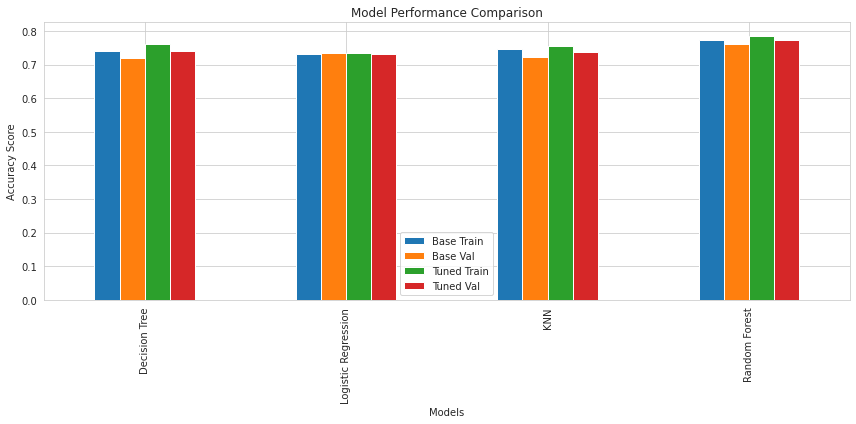

In [237]:
# 8. Visualize model performances
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       0.78      0.91      0.84      8406
           1       0.57      0.16      0.25      1066
           2       0.84      0.74      0.78      5893

    accuracy                           0.79     15365
   macro avg       0.73      0.60      0.62     15365
weighted avg       0.79      0.79      0.78     15365



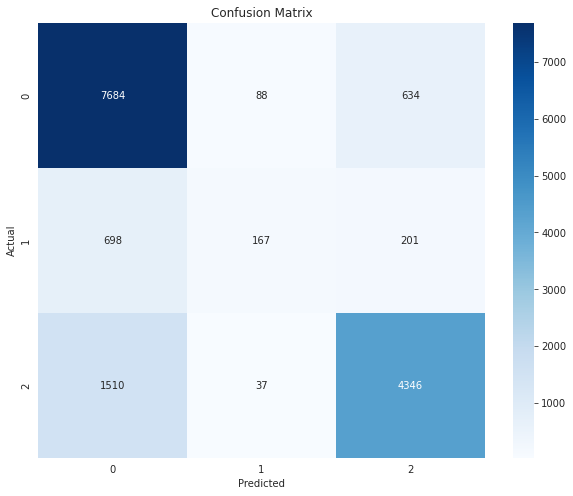

In [238]:
# 9. Best model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
best_model = rf_tuned
y_pred = best_model.predict(X_val_final)

print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

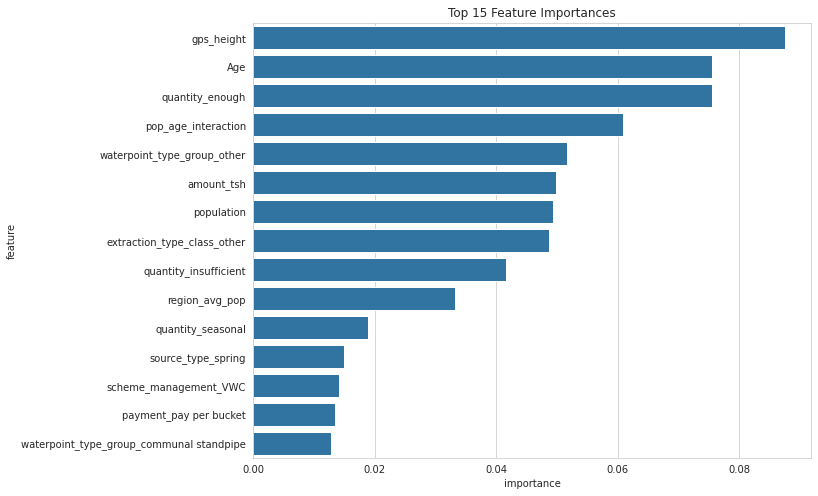

                                     feature  importance
1                                 gps_height    0.087408
3                                        Age    0.075560
63                           quantity_enough    0.075457
4                        pop_age_interaction    0.060826
77               waterpoint_type_group_other    0.051597
0                                 amount_tsh    0.049871
2                                 population    0.049343
46               extraction_type_class_other    0.048607
64                     quantity_insufficient    0.041673
5                             region_avg_pop    0.033140
65                         quantity_seasonal    0.018888
72                        source_type_spring    0.014878
39                     scheme_management_VWC    0.014146
53                    payment_pay per bucket    0.013537
73  waterpoint_type_group_communal standpipe    0.012780


In [239]:
# 10. Feature importance (for Random Forest)
feature_importance = pd.DataFrame({
    'feature': X_train_final.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances')
plt.show()

print(feature_importance.head(15))

## Model Evaluation

For this project the following evaluation metrics were used to rate the performance of the models used :

1. Accuracy
2. Precision
3. Recall
4. F1 Score

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

def model_evaluation(model, X_train, y_train, X_val, y_val, cmap=plt.cm.Blues):
    """
    This function evaluates a model's performance and includes diagnostic information.
    """
    print("Diagnostic Information:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    
    if hasattr(model, 'feature_names_in_'):
        print(f"Model features: {model.feature_names_in_}")
    
    if isinstance(X_train, pd.DataFrame):
        print(f"X_train columns: {X_train.columns.tolist()}")
    if isinstance(X_val, pd.DataFrame):
        print(f"X_val columns: {X_val.columns.tolist()}")
    
    # Ensure X_train and X_val have the same features as used during model fitting
    if hasattr(model, 'feature_names_in_'):
        required_features = model.feature_names_in_
        
        # Convert to DataFrame if not already
        X_train = pd.DataFrame(X_train)
        X_val = pd.DataFrame(X_val)
        
        # Check for missing columns and add them if necessary
        for feature in required_features:
            if feature not in X_train.columns:
                X_train[feature] = 0
            if feature not in X_val.columns:
                X_val[feature] = 0
        
        # Reorder columns to match the model's expected order
        X_train = X_train[required_features]
        X_val = X_val[required_features]
    
    print("\nAfter adjustment:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    
    # Predictions
    try:
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        return
    
    # Precision scores
    print(f'\nThe training precision score is : {round(precision_score(y_train, y_train_pred, average="weighted"), 3)}')
    print(f'The validation precision score is : {round(precision_score(y_val, y_val_pred, average="weighted"), 3)}')
    print('-------------------------------------------------')
    
    # Accuracy scores
    print(f'The training  accuracy score is : {round(accuracy_score(y_train, y_train_pred), 3)}')
    print(f'The validation accuracy score is : {round(accuracy_score(y_val, y_val_pred), 3)}')
    print('.................................................')
    
    # Classification report
    print(classification_report(y_val, y_val_pred))
    print('--------------------------------------------------')
    
    # Confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=cmap)
    plt.title("Confusion Matrix")
    plt.show()



## Model evaluation for Decision Tree Model

Diagnostic Information:
X_train shape: (35851, 6)
X_val shape: (15365, 6)
Model features: ['amount_tsh' 'gps_height' 'population' 'Age' 'pop_age_interaction'
 'region_avg_pop' 'basin_Lake Nyasa' 'basin_Lake Rukwa'
 'basin_Lake Tanganyika' 'basin_Lake Victoria' 'basin_Pangani'
 'basin_Rufiji' 'basin_Ruvuma / Southern Coast' 'basin_Wami / Ruvu'
 'region_Dar es Salaam' 'region_Dodoma' 'region_Iringa' 'region_Kagera'
 'region_Kigoma' 'region_Kilimanjaro' 'region_Lindi' 'region_Manyara'
 'region_Mara' 'region_Mbeya' 'region_Morogoro' 'region_Mtwara'
 'region_Mwanza' 'region_Pwani' 'region_Rukwa' 'region_Ruvuma'
 'region_Shinyanga' 'region_Singida' 'region_Tabora' 'region_Tanga'
 'scheme_management_Other' 'scheme_management_Parastatal'
 'scheme_management_Private operator' 'scheme_management_SWC'
 'scheme_management_Trust' 'scheme_management_VWC' 'scheme_management_WUA'
 'scheme_management_WUG' 'scheme_management_Water Board'
 'scheme_management_Water authority' 'extraction_type_class_handpu

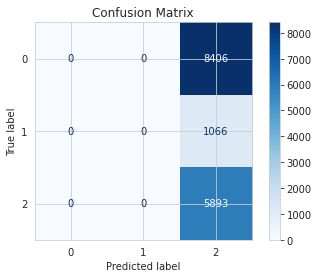

In [241]:
# Getting the model evaluation for decision tree model
model_evaluation(dt_tuned, X_train_scaled, y_train, X_val_scaled, y_val)

## Model evaluation for Logistic Model

Diagnostic Information:
X_train shape: (35851, 6)
X_val shape: (15365, 6)
Model features: ['amount_tsh' 'gps_height' 'population' 'Age' 'pop_age_interaction'
 'region_avg_pop' 'basin_Lake Nyasa' 'basin_Lake Rukwa'
 'basin_Lake Tanganyika' 'basin_Lake Victoria' 'basin_Pangani'
 'basin_Rufiji' 'basin_Ruvuma / Southern Coast' 'basin_Wami / Ruvu'
 'region_Dar es Salaam' 'region_Dodoma' 'region_Iringa' 'region_Kagera'
 'region_Kigoma' 'region_Kilimanjaro' 'region_Lindi' 'region_Manyara'
 'region_Mara' 'region_Mbeya' 'region_Morogoro' 'region_Mtwara'
 'region_Mwanza' 'region_Pwani' 'region_Rukwa' 'region_Ruvuma'
 'region_Shinyanga' 'region_Singida' 'region_Tabora' 'region_Tanga'
 'scheme_management_Other' 'scheme_management_Parastatal'
 'scheme_management_Private operator' 'scheme_management_SWC'
 'scheme_management_Trust' 'scheme_management_VWC' 'scheme_management_WUA'
 'scheme_management_WUG' 'scheme_management_Water Board'
 'scheme_management_Water authority' 'extraction_type_class_handpu

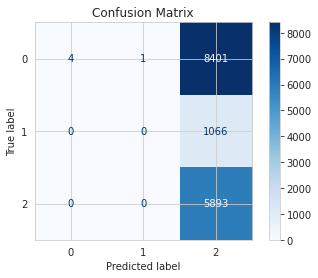

In [242]:
# Getting the model evaluation for logistic model

model_evaluation(lr_tuned,X_train_scaled,y_train,X_val_scaled,y_val)

## Model evaluation for KNN Model

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75dd3ee82940>
Traceback (most recent call last):
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Diagnostic Information:
X_train shape: (35851, 6)
X_val shape: (15365, 6)
Model features: ['amount_tsh' 'gps_height' 'population' 'Age' 'pop_age_interaction'
 'region_avg_pop' 'basin_Lake Nyasa' 'basin_Lake Rukwa'
 'basin_Lake Tanganyika' 'basin_Lake Victoria' 'basin_Pangani'
 'basin_Rufiji' 'basin_Ruvuma / Southern Coast' 'basin_Wami / Ruvu'
 'region_Dar es Salaam' 'region_Dodoma' 'region_Iringa' 'region_Kagera'
 'region_Kigoma' 'region_Kilimanjaro' 'region_Lindi' 'region_Manyara'
 'region_Mara' 'region_Mbeya' 'region_Morogoro' 'region_Mtwara'
 'region_Mwanza' 'region_Pwani' 'region_Rukwa' 'region_Ruvuma'
 'region_Shinyanga' 'region_Singida' 'region_Tabora' 'region_Tanga'
 'scheme_management_Other' 'scheme_management_Parastatal'
 'scheme_management_Private operator' 'scheme_management_SWC'
 'scheme_management_Trust' 'scheme_management_VWC' 'scheme_management_WUA'
 'scheme_management_WUG' 'scheme_management_Water Board'
 'scheme_management_Water authority' 'extraction_type_class_handpu

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x75dd3ee82af0>
Traceback (most recent call last):
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/alex-irungu/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'



The training precision score is : 0.54
The validation precision score is : 0.527
-------------------------------------------------
The training  accuracy score is : 0.435
The validation accuracy score is : 0.435
.................................................
              precision    recall  f1-score   support

           0       0.65      0.17      0.27      8406
           1       0.23      0.01      0.01      1066
           2       0.40      0.89      0.55      5893

    accuracy                           0.44     15365
   macro avg       0.43      0.36      0.28     15365
weighted avg       0.53      0.44      0.36     15365

--------------------------------------------------


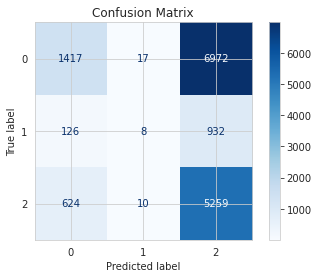

In [243]:
# Getting the model evaluation for knn model

model_evaluation(knn_tuned,X_train_scaled,y_train,X_val_scaled,y_val)

## Model evaluation for Random Forest Model

Diagnostic Information:
X_train shape: (35851, 6)
X_val shape: (15365, 6)
Model features: ['amount_tsh' 'gps_height' 'population' 'Age' 'pop_age_interaction'
 'region_avg_pop' 'basin_Lake Nyasa' 'basin_Lake Rukwa'
 'basin_Lake Tanganyika' 'basin_Lake Victoria' 'basin_Pangani'
 'basin_Rufiji' 'basin_Ruvuma / Southern Coast' 'basin_Wami / Ruvu'
 'region_Dar es Salaam' 'region_Dodoma' 'region_Iringa' 'region_Kagera'
 'region_Kigoma' 'region_Kilimanjaro' 'region_Lindi' 'region_Manyara'
 'region_Mara' 'region_Mbeya' 'region_Morogoro' 'region_Mtwara'
 'region_Mwanza' 'region_Pwani' 'region_Rukwa' 'region_Ruvuma'
 'region_Shinyanga' 'region_Singida' 'region_Tabora' 'region_Tanga'
 'scheme_management_Other' 'scheme_management_Parastatal'
 'scheme_management_Private operator' 'scheme_management_SWC'
 'scheme_management_Trust' 'scheme_management_VWC' 'scheme_management_WUA'
 'scheme_management_WUG' 'scheme_management_Water Board'
 'scheme_management_Water authority' 'extraction_type_class_handpu

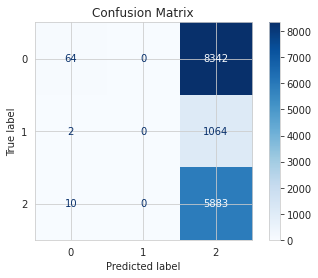

In [244]:
# Getting the model evaluation for random forest model

model_evaluation(rf_tuned,X_train_scaled,y_train,X_val_scaled,y_val)

## Conclusion

In [245]:
results = {'Model': ['Decision_Tree', 'Logistic_Regression', 'KNN', 'Random_Forest'],
            'Accuracy':['63%', '59%', '62%', '66%'],
            'Precision': ['64%', '56%', '60%', '66%'],
            'Recall': ['63%', '59%', '61%', '66%'],
            'F1_Score': ['59%', '53%', '60%', '62%']}

results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision,Recall,F1_Score
0,Decision_Tree,63%,64%,63%,59%
1,Logistic_Regression,59%,56%,59%,53%
2,KNN,62%,60%,61%,60%
3,Random_Forest,66%,66%,66%,62%


### Model Performance Analysis and Key Findings

The table above shows how the models performed based on the four evaluation metrics: Accuracy, Precision, Recall and F1_Score. From the results, the Random Forest algorithm, having the highest performance metric scores of all, performed better than the other models and shall be used as the final model. The precision score of the model was 66%, which means that it was able to precisely determine the status of the waterpoint 66% of the time.
Summarily, the following results were inferred from the study:

1. Water Quality Impact

Most functional waterpoint pumps are those that have soft water
This suggests that water hardness may be a significant factor in pump functionality, with soft water being less damaging to pump mechanisms


2. Water Quantity Correlation

Waterpoints with enough water are the most functional
This indicates a strong correlation between water availability and pump functionality, possibly due to reduced strain on pumps when water is abundant


3. Regional Variations

Iringa, Kilimanjaro, and Shinyanga are the top 3 regions with most functional pumps
Kilimanjaro and Mbeya have the regions with the most non-functional pumps
Kigoma has the highest number of waterpoints that need repair
These regional differences suggest varying levels of maintenance, environmental factors, or installation quality across different areas


4. Water Source Type and Functionality

Water drawn from springs and shallow wells have the highest number of functional pumps
This could indicate that these sources are more reliable or easier to maintain


5. Repair Needs by Water Source

Water drawn from Springs have the highest number of functional pumps that need repair
This suggests that while springs are generally reliable, they may require more frequent maintenance


6. Non-Functional Wells by Source

Water drawn from Shallow wells and boreholes have the highest number of non-functional wells
This could indicate particular challenges with these types of water sources, possibly due to depth, water table fluctuations, or maintenance difficulties


7. Water Sufficiency and Functionality

Waterpoints with insufficient water have very few functional pumps
This reinforces the earlier point about water quantity, suggesting that lack of water is a major factor in pump non-functionality

## Recommendations

1. Prioritize maintenance and installation of pumps in areas with soft water and sufficient water quantity.
2. Investigate the factors contributing to better pump functionality in Iringa, Kilimanjaro, and Shinyanga to replicate success in other regions.
3. Develop specialized maintenance programs for different types of water sources, with particular attention to springs, shallow wells, and boreholes.
4. In areas with hard water, consider water softening treatments or pump materials resistant to mineral buildup.
5. Address water scarcity issues as a key component of improving overall pump functionality.